In [3]:
from sklearn import datasets
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# KNN Implementation

In [2]:
from scipy.stats import mode

class KNN_Classifier:
    xTrain = []
    yTrain = []
    yTest = []
    k_smaller = []
    k = 0
    
    def __init__(self, k = 5):
        self.k = k
        
    def fit(self, xTrain, yTrain):
        self.xTrain = xTrain
        self.yTrain = yTrain
    
    def predict(self, xTest):
        dists_result = []
        dists_result = self._dist_calculation_all(self.xTrain, xTest, self.yTrain)
        self.insertion_sort_all(dists_result)
        self.k_smaller = self._get_k_neighborhood_all(dists_result, self.k)
        self.k_smaller =self._get_mode(self.k_smaller)
        return self.k_smaller
        
        
    def _euclidian_dist(self, arrayA, arrayB):
        dist = 0
        for i, j in zip(arrayA, arrayB):
            dist += (i - j)**2
        return dist**(1/2)

    def _dist_calculation(self, xTrain, xTest, yTrain):
        i = 0
        dist_target = []
        for instances in self.xTrain:
            dist = self._euclidian_dist(instances, xTest)
            dist_target.append([dist, yTrain[i]])
            i += 1    
        return dist_target

    def _dist_calculation_all(self, xTrain, xTest, yTrain,):
        dists_all = []
        for index in range(0, len(xTest)):
            dists_all.append(self._dist_calculation(xTrain, xTest[index], yTrain))
        return dists_all

#     def insertion_sort(self, array):
#         for index in range(1, len(array)):
#             currentValue = array[index]
#             currentPosition = index

#         while currentPosition > 0 and array[currentPosition - 1] > currentValue:
#             array[currentPosition] = array[currentPosition -1]
#             currentPosition = currentPosition - 1

#         array[currentPosition] = currentValue
#         print(array,'\n\n\n\n\n')
        
    def insertion_sort_all(self, array):
#         for array_each_sample in array:
#             for index in range(1, len(array_each_sample)):
#                 currentValue = array_each_sample[index]
#                 currentPosition = index

#             while currentPosition > 0 and array_each_sample[currentPosition - 1] > currentValue:
#                 array_each_sample[currentPosition] = array_each_sample[currentPosition -1]
#                 currentPosition = currentPosition - 1

#             array_each_sample[currentPosition] = currentValue
        
        
        for distanciasParaDadoTesteAtual in array:
            
            # EU A ORDENO
            for i in range(len(distanciasParaDadoTesteAtual) - 1):
                for j in range(i+1, len(distanciasParaDadoTesteAtual)):
                    
                    if distanciasParaDadoTesteAtual[j] < distanciasParaDadoTesteAtual[i]:
                        linhaAux = distanciasParaDadoTesteAtual[j]
                        distanciasParaDadoTesteAtual[j] = distanciasParaDadoTesteAtual[i]
                        distanciasParaDadoTesteAtual[i] = linhaAux

#         for i in range(0, len(array)):
#             array[i].sort()
    

    def _get_k_neighborhood(self, array, k):
        k_smaller = []
        k_smaller = array[:k]
        k_smaller_class = []
        for index in range(0, k):
            k_smaller_class.append(k_smaller[index][1])
        return k_smaller_class
    
    def _get_k_neighborhood_all(self, array, k):
        k_smaller_all = []
        for index in range(0, len(array)):
            k_smaller_all.append(self._get_k_neighborhood(array[index], k))
        return k_smaller_all
      
    def _get_mode(self, array):
        mode_array = []
        for index in range(0, len(array)):
            moda = mode(array[index])[0][0]
            mode_array.append(moda)
        return mode_array

# Plot Functions

## Metrics Plot

In [3]:
def plotMetrics(kKnn, accuracy, precision, recall, name):
    dataframe = {'Vizinhos': kKnn, 'accuracy': accuracy, 'precision': precision, 'recall': recall}
    dataMy = pd.DataFrame(data=dataframe)

    plt.figure(figsize=(12, 8))
    sns.set(style="darkgrid")
    dataMy = dataMy.melt('Vizinhos', var_name='cols',  value_name='Metricas')
    sns.lineplot(x="Vizinhos", y="Metricas", hue='cols', data=dataMy, markers=True, dashes=True, err_style="bars", ci=68, style="cols")
    #ax2 = plt.twinx()
    #sns.lineplot(data=dataTime, color="b", ax=ax2)
    plt.savefig(name+'.pdf', format='pdf', bbox_inches = 'tight', dpi = 400)

## Time Plot

In [4]:
def plotTime(kKnn ,timeMyKNN, timeKNN, name):
    dataframe = {'Vizinhos': kKnn, 'TimeMyKNN': timeMyKNN, 'TimeKNN': timeKNN}
    dataMy = pd.DataFrame(data=dataframe)

    plt.figure(figsize=(12, 8))
    sns.set(style="darkgrid")
    dataMy = dataMy.melt('Vizinhos', var_name='cols',  value_name='Tempo')
    sns.lineplot(x="Vizinhos", y="Tempo", hue='cols', data=dataMy, markers=True, dashes=True, err_style="bars", ci=68, style="cols")
    #ax2 = plt.twinx()
    #sns.lineplot(data=dataTime, color="b", ax=ax2)
    plt.savefig(name+'.pdf', format='pdf', bbox_inches = 'tight', dpi = 400)

# Function to Compute KNN

In [5]:
def ComputationAlgoReturn(xTrain, xTest, yTrain, yTest, k):
    accuracyMyKNN = []
    precisionMyKNN = []
    recallMyKNN = []
    timeMyKNN = []
    kKnn = np.arange(1, k+1, 2)

    for k_n in range(1, k+1, 2):

        #Start off tracking the algo time
        inicio_KNN = time.time()

        KNN = KNN_Classifier(k = k_n)
        KNN.fit(xTrain, yTrain)
        results = KNN.predict(xTest)

        #Ending tracking algo
        fim_KNN = time.time()


        #Compute the time ran
        time_ran = fim_KNN - inicio_KNN
        timeMyKNN.append(time_ran)

        #Calculating the main metrics --> Accuracy, Precision and Recall
        accuracyMyKNN.append(accuracy_score(results, yTest))
        precisionMyKNN.append(precision_score(results, yTest, average='macro'))
        recallMyKNN.append(recall_score(results, yTest, average='macro'))


    accuracyKNN = []
    precisionKNN = []
    recallKNN = []
    timeKNN = [] 

    for k_n in range(1, k+1, 2):

        #Start off tracking the algo time
        inicio_KNN = time.time()

        KNN_SK = KNeighborsClassifier(n_neighbors=k_n)
        KNN_SK.fit(xTrain, yTrain)
        results_SK = KNN_SK.predict(xTest)

        #Ending tracking algo
        fim_KNN = time.time()


        #Compute the time ran
        timeRan = fim_KNN - inicio_KNN
        timeKNN.append(timeRan)

        #Calculating the main metrics --> Accuracy, Precision and Recall
        accuracyKNN.append(accuracy_score(results_SK, yTest))
        precisionKNN.append(precision_score(results_SK, yTest, average='macro'))
        recallKNN.append(recall_score(results_SK, yTest, average='macro'))
        
    return  accuracyMyKNN, precisionMyKNN, recallMyKNN, timeMyKNN, accuracyKNN, precisionKNN, recallKNN, timeKNN, kKnn

# DATASET 1

### Importando dataset e separando em dados de teste e treino

In [6]:
dataset1 = pd.read_csv('./datasets/dataset1.txt', header = None, names=['feat1', 'feat2', 'target']) 

xTrain, xTest, yTrain, yTest = tts(dataset1[['feat1', 'feat2']].values, dataset1.target.values, shuffle = True, test_size = 0.25)

### Treinando o KNN 

In [7]:

am1, pm1, rm1, tm1, a1, p1, r1, t1, k1 = ComputationAlgoReturn(xTrain, xTest, yTrain, yTest, 10)

## Plotando Métricas 

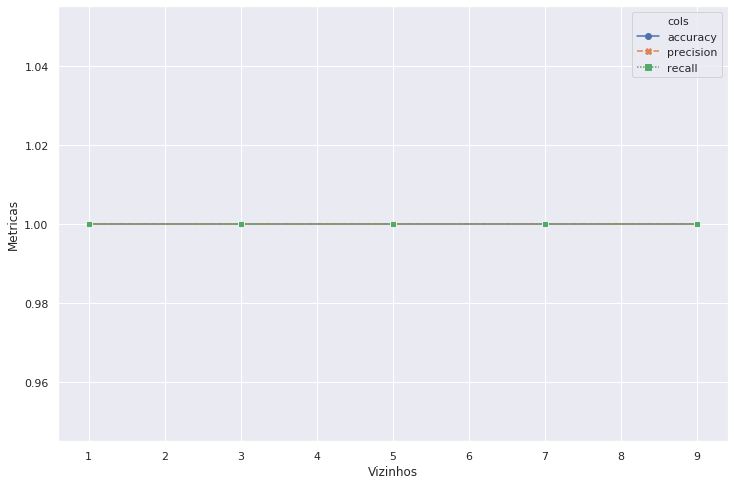

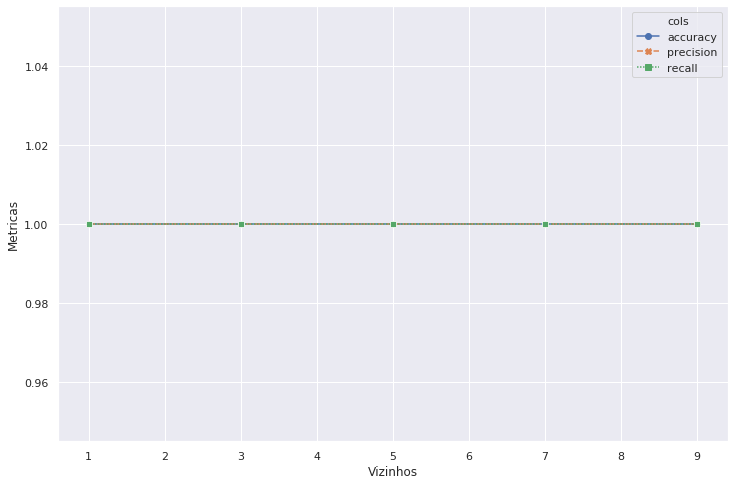

In [8]:
plotMetrics(k1, am1, pm1, rm1, 'dataset1MeuKNN')
plotMetrics(k1, a1, p1, r1, 'dataset1KNN')

# DATASET 2

### Importando dataset e separando em dados de teste e treino

In [9]:
dataset2 = pd.read_csv('./datasets/dataset2.txt', header = None, names=['feat1', 'feat2', 'target']) 

xTrain, xTest, yTrain, yTest = tts(dataset2[['feat1', 'feat2']].values, dataset2.target.values, shuffle = True, test_size = 0.25)

### Treinando o KNN 

In [10]:

am2, pm2, rm2, tm2, a2, p2, r2, t2, k2 = ComputationAlgoReturn(xTrain, xTest, yTrain, yTest, 10)

## Plotando Métricas 

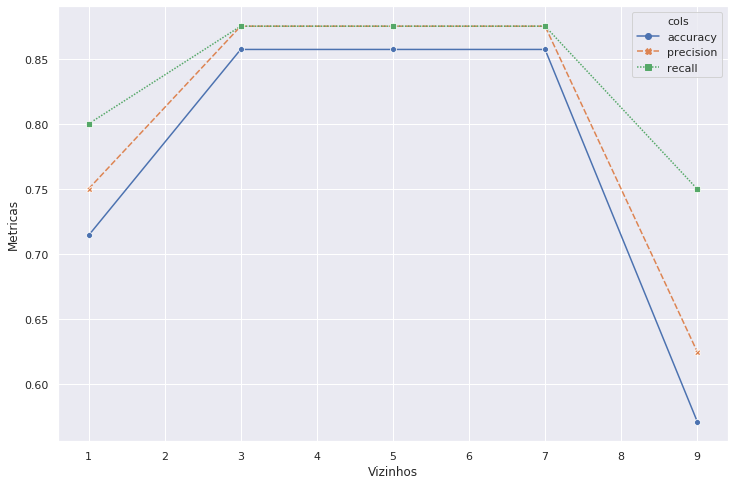

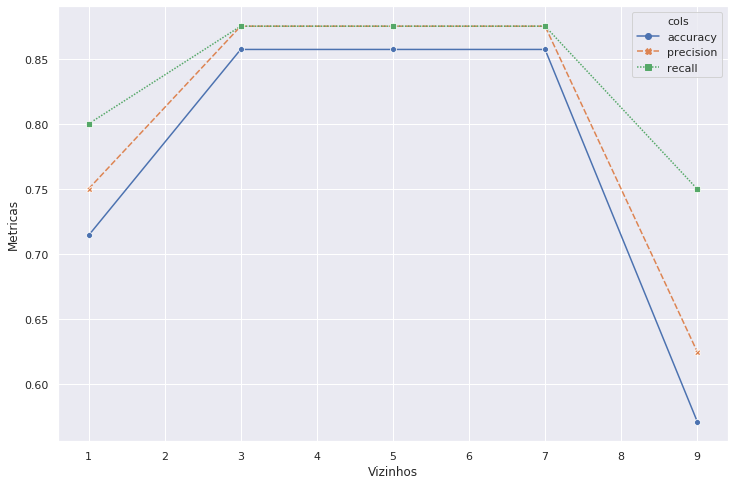

In [11]:
plotMetrics(k2, am2, pm2, rm2, 'dataset2MeuKNN')
plotMetrics(k2, a2, p2, r2, 'dataset2KNN')

# DATASET 3

### Importando dataset e separando em dados de teste e treino

In [12]:
dataset3 = pd.read_csv('./datasets/dataset3.txt', header = None, names=['feat1', 'feat2', 'target']) 

xTrain, xTest, yTrain, yTest = tts(dataset3[['feat1', 'feat2']].values, dataset3.target.values, shuffle = True, test_size = 0.25)

### Treinando o KNN 

In [13]:

am3, pm3, rm3, tm3, a3, p3, r3, t3, k3 = ComputationAlgoReturn(xTrain, xTest, yTrain, yTest, 10)

## Plotando Métricas 

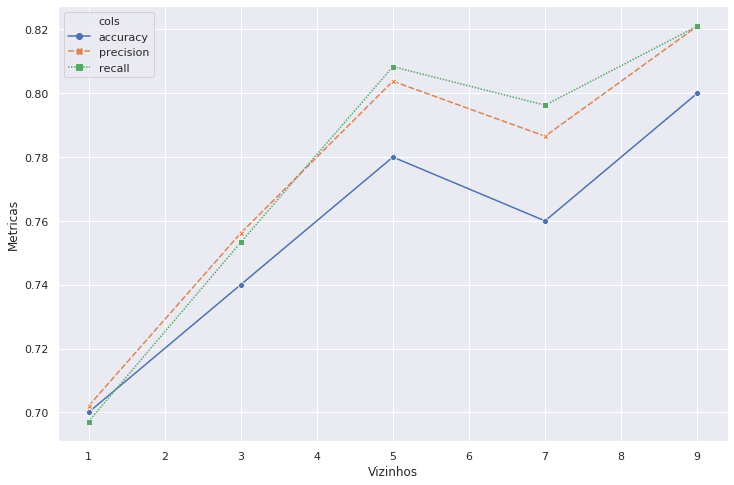

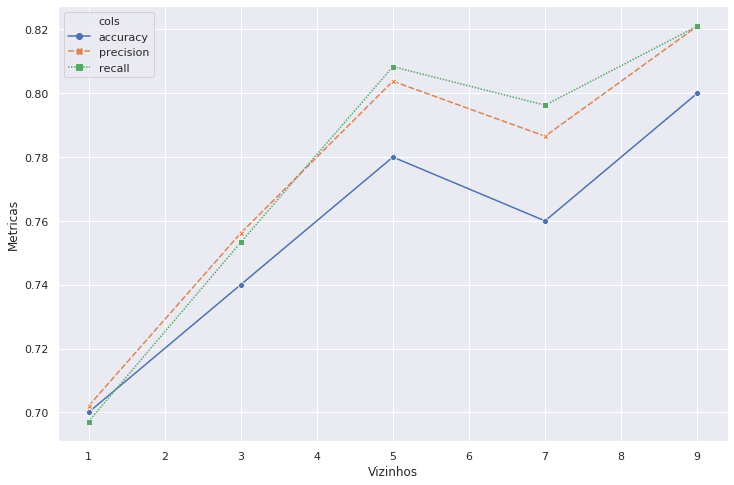

In [14]:
plotMetrics(k3, am3, pm3, rm3, 'dataset3MeuKNN')
plotMetrics(k3, a3, p3, r3, 'dataset3KNN')

# DATASET 4

### Importando dataset e separando em dados de teste e treino

In [15]:
dataset4 = pd.read_csv('./datasets/dataset4.txt', header = None, names=['feat1', 'feat2', 'target']) 

xTrain, xTest, yTrain, yTest = tts(dataset4[['feat1', 'feat2']].values, dataset4.target.values, shuffle = True, test_size = 0.25)

### Treinando o KNN 

In [16]:

am4, pm4, rm4, tm4, a4, p4, r4, t4, k4 = ComputationAlgoReturn(xTrain, xTest, yTrain, yTest, 10)

## Plotando Métricas 

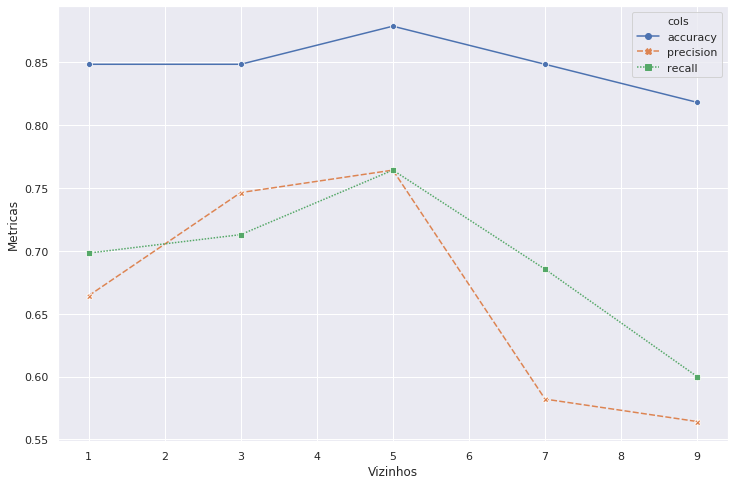

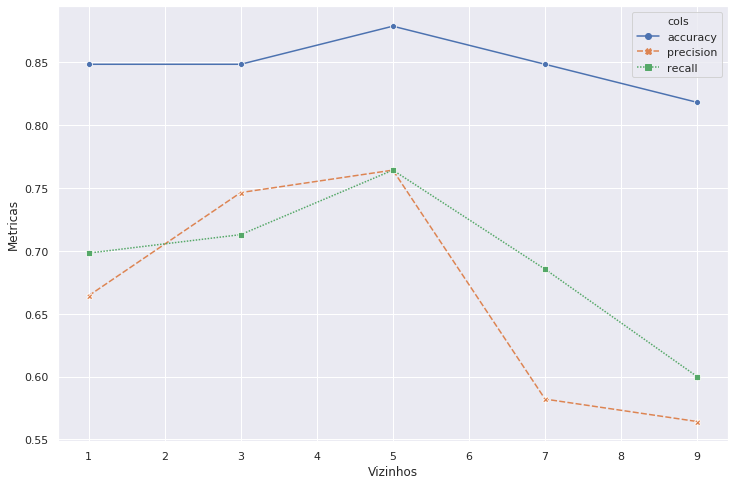

In [17]:
plotMetrics(k4, am4, pm4, rm4, 'dataset4MeuKNN')
plotMetrics(k4, a4, p4, r4, 'dataset4KNN')

# DATASET 5

### Importando dataset e separando em dados de teste e treino

In [18]:
dataset5 = pd.read_csv('./datasets/dataset5.txt', header = None, names=['feat1', 'feat2', 'target']) 

xTrain, xTest, yTrain, yTest = tts(dataset5[['feat1', 'feat2']].values, dataset5.target.values, shuffle = True, test_size = 0.25)

### Treinando o KNN 

In [19]:

am5, pm5, rm5, tm5, a5, p5, r5, t5, k5 = ComputationAlgoReturn(xTrain, xTest, yTrain, yTest, 10)

## Plotando Métricas 

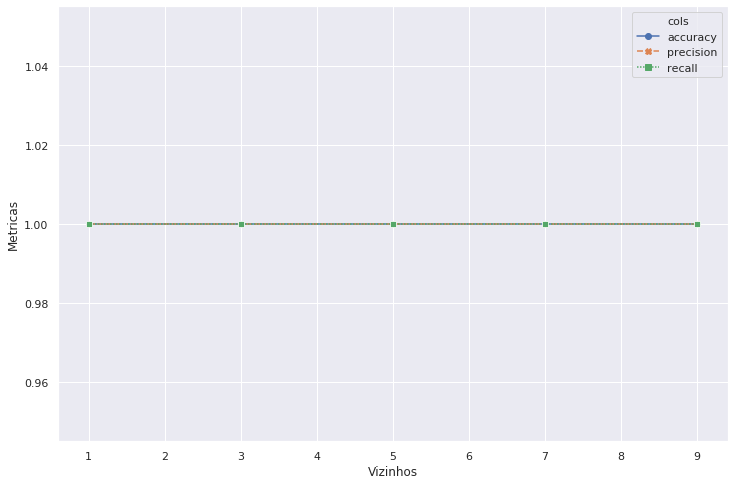

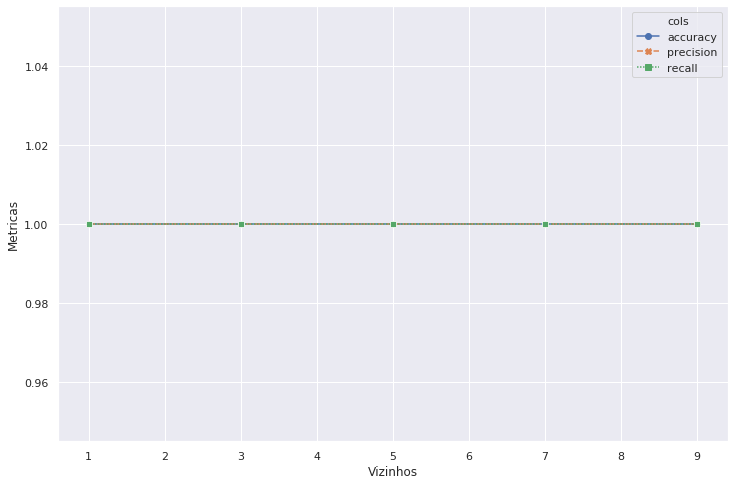

In [20]:
plotMetrics(k5, am5, pm5, rm5, 'dataset5MeuKNN')
plotMetrics(k5, a5, p5, r5, 'dataset5KNN')

# DATASET 6

### Importando dataset e separando em dados de teste e treino

In [21]:
dataset6 = pd.read_csv('./datasets/dataset6.txt', header = None, names=['feat1', 'feat2', 'target']) 

xTrain, xTest, yTrain, yTest = tts(dataset6[['feat1', 'feat2']].values, dataset6.target.values, shuffle = True, test_size = 0.25)

### Treinando o KNN 

In [22]:

am6, pm6, rm6, tm6, a6, p6, r6, t6, k6 = ComputationAlgoReturn(xTrain, xTest, yTrain, yTest, 10)

## Plotando Métricas 

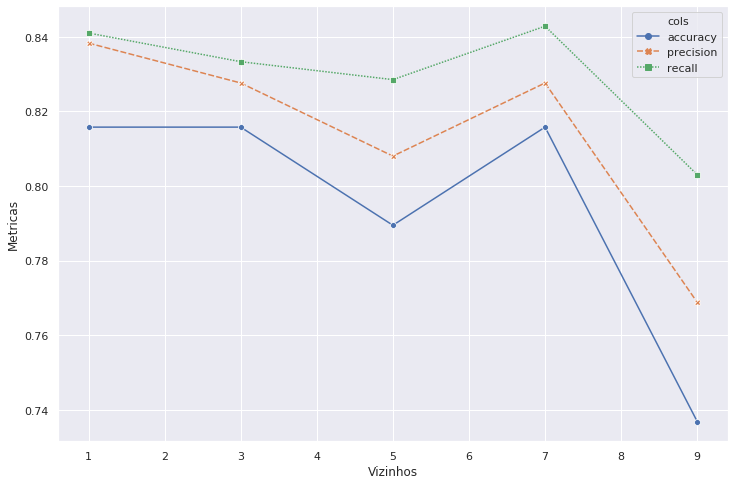

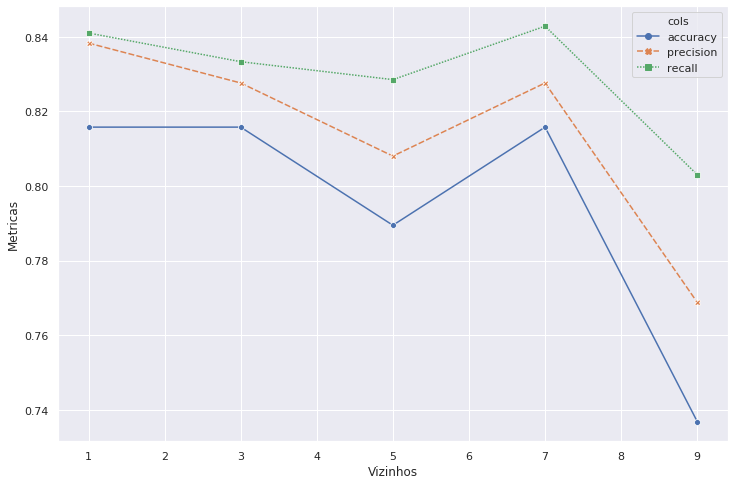

In [23]:
plotMetrics(k6, am6, pm6, rm6, 'dataset6MeuKNN')
plotMetrics(k6, a6, p6, r6, 'dataset6KNN')

# DATASET 7 --> Two Spirals

### Importando dataset e separando em dados de teste e treino

In [24]:
dataset7 = pd.read_csv('./datasets/twospirals.csv', header = None, names=['feat1', 'feat2', 'target']) 

xTrain, xTest, yTrain, yTest = tts(dataset7[['feat1', 'feat2']].values, dataset7.target.values, shuffle = True, test_size = 0.25)

### Treinando o KNN 

In [25]:

am7, pm7, rm7, tm7, a7, p7, r7, t7, k7 = ComputationAlgoReturn(xTrain, xTest, yTrain, yTest, 20)

## Plotando Métricas 

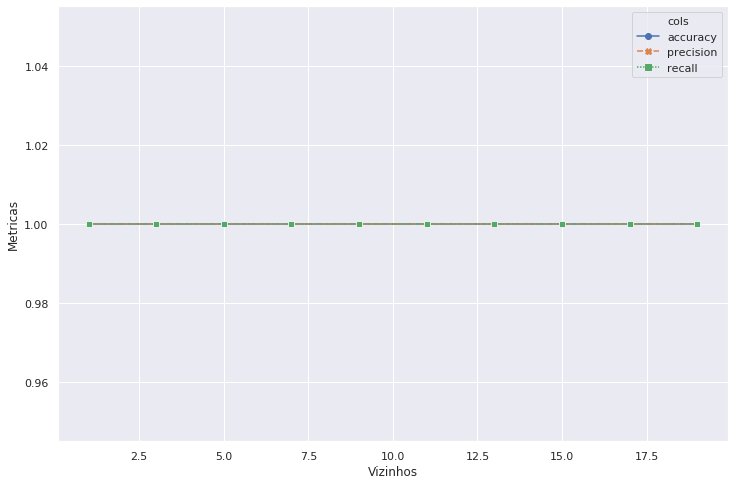

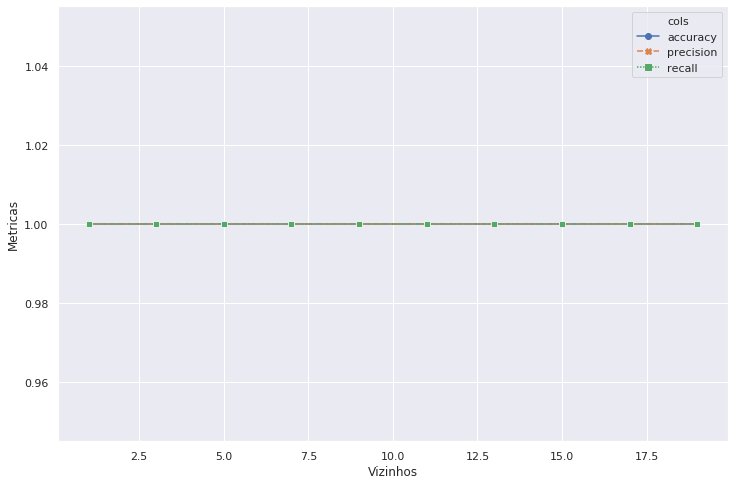

In [26]:
plotMetrics(k7, am7, pm7, rm7, 'dataset7twospiralsMeuKNN')
plotMetrics(k7, a7, p7, r7, 'dataset7twospiralsKNN')

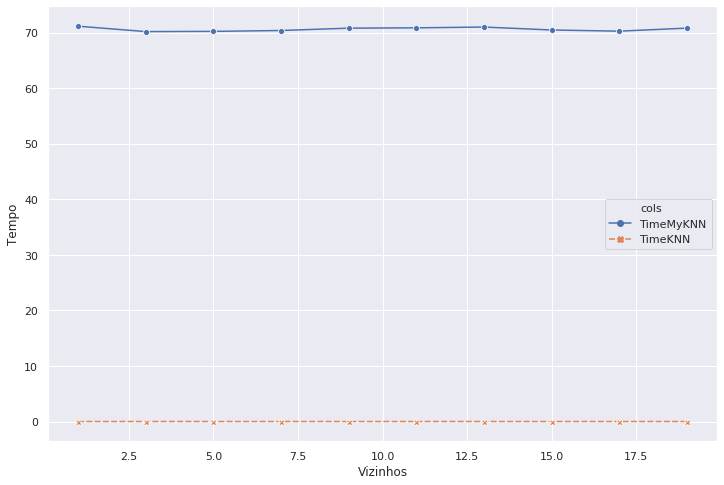

In [27]:
plotTime(k7 ,tm7, t7, 'twospiralsTime')

# DATASET 8 --> Cluster in Cluster

### Importando dataset e separando em dados de teste e treino

In [28]:
dataset8 = pd.read_csv('./datasets/clusterincluster.csv', header = None, names=['feat1', 'feat2', 'target']) 

xTrain, xTest, yTrain, yTest = tts(dataset8[['feat1', 'feat2']].values, dataset8.target.values, shuffle = True, test_size = 0.25)

### Treinando o KNN 

In [29]:

am8, pm8, rm8, tm8, a8, p8, r8, t8, k8 = ComputationAlgoReturn(xTrain, xTest, yTrain, yTest, 20)

## Plotando Métricas 

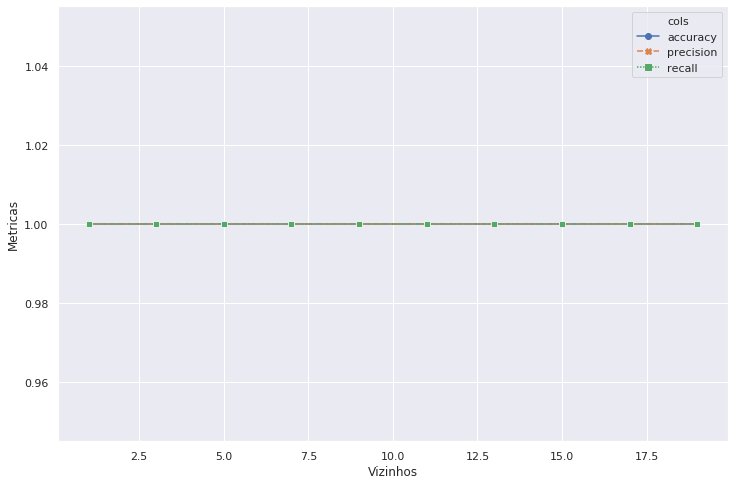

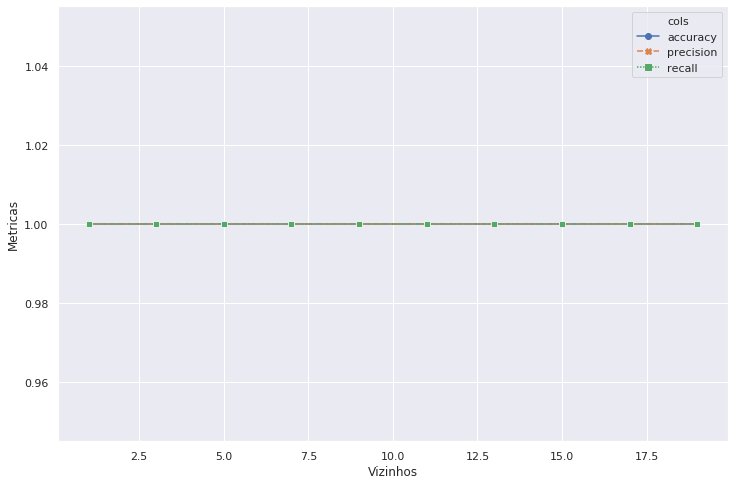

In [30]:
plotMetrics(k8, am8, pm8, rm8, 'dataset8cluesterinclusterMeuKNN')
plotMetrics(k8, a8, p8, r8, 'dataset7clusterinclusterKNN')

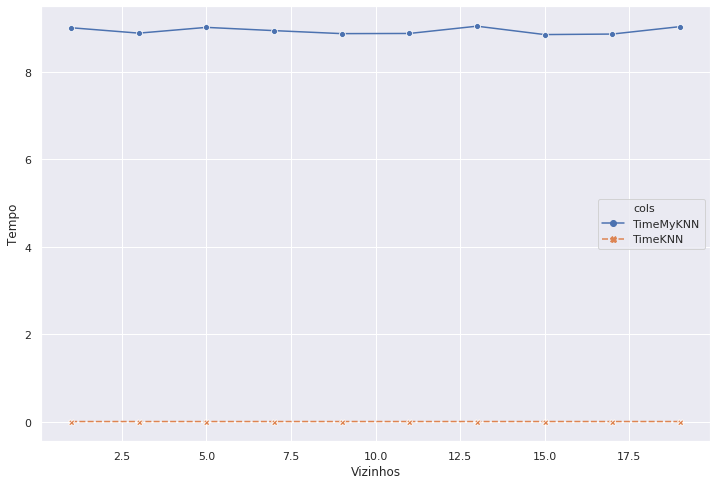

In [31]:
plotTime(k8 ,tm8, t8, 'clusterinclusterTime')

# DATASET 9 --> Corners

### Importando dataset e separando em dados de teste e treino

In [32]:
dataset9 = pd.read_csv('./datasets/corners.csv', header = None, names=['feat1', 'feat2', 'target']) 

xTrain, xTest, yTrain, yTest = tts(dataset9[['feat1', 'feat2']].values, dataset9.target.values, shuffle = True, test_size = 0.25)

### Treinando o KNN 

In [33]:

am9, pm9, rm9, tm9, a9, p9, r9, t9, k9 = ComputationAlgoReturn(xTrain, xTest, yTrain, yTest, 20)

## Plotando Métricas 

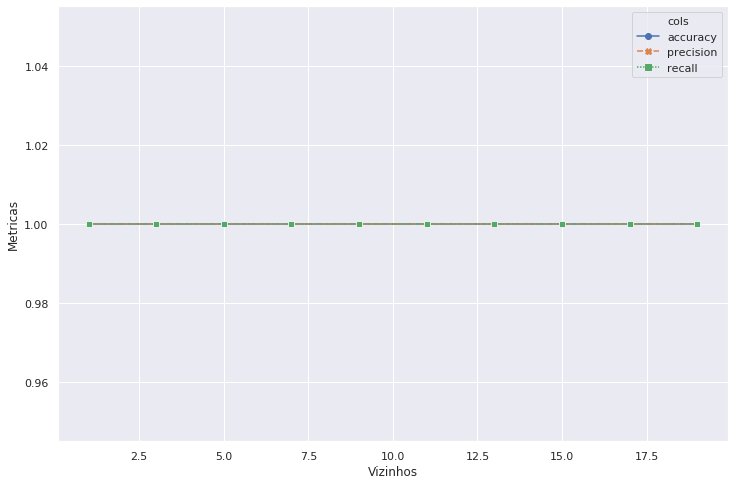

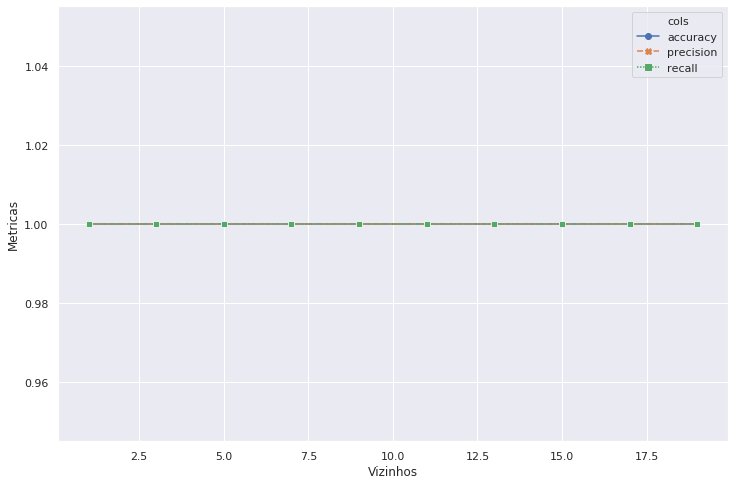

In [34]:
plotMetrics(k9, am9, pm9, rm9, 'dataset9cornersMeuKNN')
plotMetrics(k9, a9, p9, r9, 'dataset9cornersKNN')

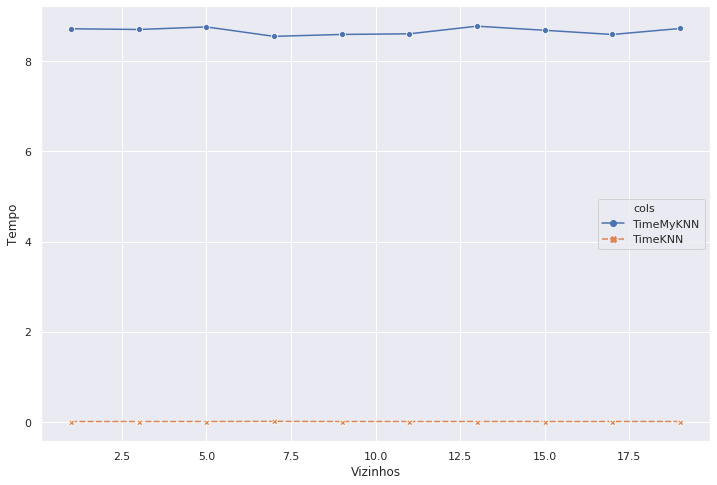

In [35]:
plotTime(k9 ,tm9, t9, 'cornerTime')

# DATASET 10 --> Half-Kernel

### Importando dataset e separando em dados de teste e treino

In [36]:
dataset10 = pd.read_csv('./datasets/halfkernel.csv', header = None, names=['feat1', 'feat2', 'target']) 

xTrain, xTest, yTrain, yTest = tts(dataset10[['feat1', 'feat2']].values, dataset10.target.values, shuffle = True, test_size = 0.25)

### Treinando o KNN 

In [37]:

am10, pm10, rm10, tm10, a10, p10, r10, t10, k10 = ComputationAlgoReturn(xTrain, xTest, yTrain, yTest, 20)

## Plotando Métricas 

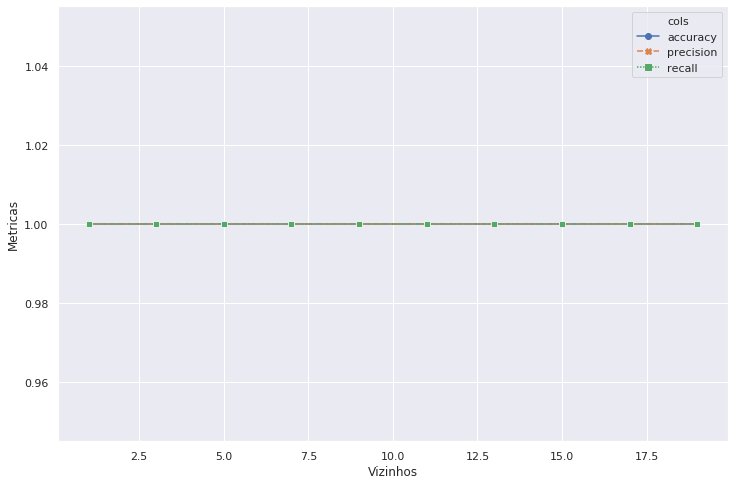

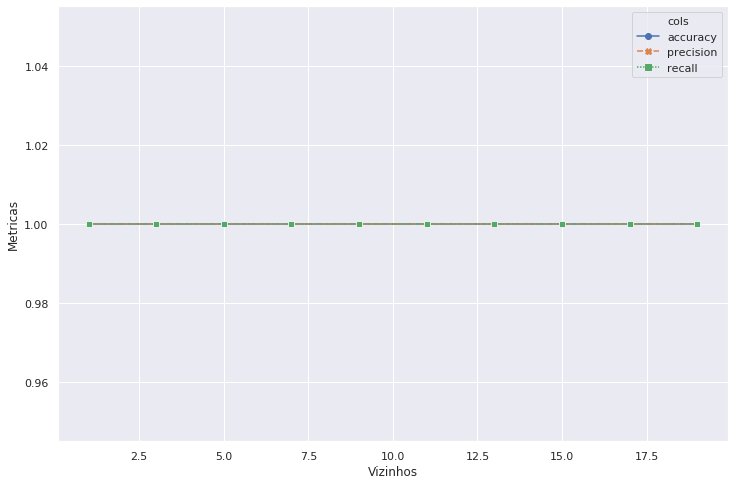

In [38]:
plotMetrics(k10, am10, pm10, rm10, 'dataset10halfkernelMeuKNN')
plotMetrics(k10, a10, p10, r10, 'dataset10halfkernelKNN')

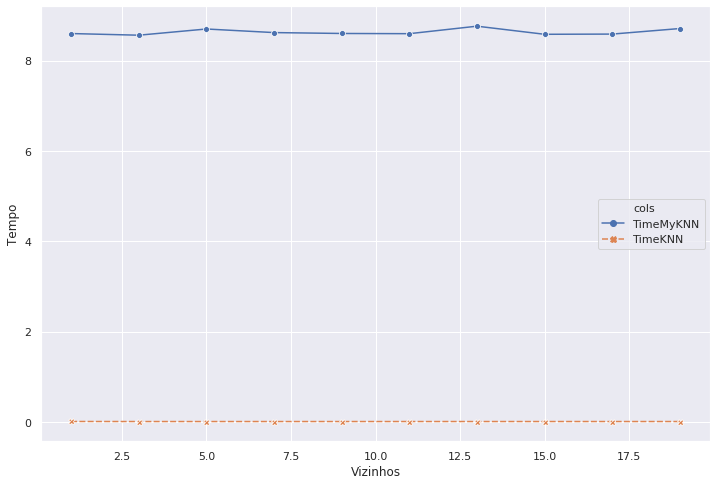

In [39]:
plotTime(k10 ,tm10, t10, 'halfkernelTime')

# DATASET 11 --> Crescent & Full Moon

### Importando dataset e separando em dados de teste e treino

In [40]:
dataset11 = pd.read_csv('./datasets/crescentfullmoon.csv', header = None, names=['feat1', 'feat2', 'target']) 

xTrain, xTest, yTrain, yTest = tts(dataset11[['feat1', 'feat2']].values, dataset11.target.values, shuffle = True, test_size = 0.25)

### Treinando o KNN 

In [41]:

am11, pm11, rm11, tm11, a11, p11, r11, t11, k11 = ComputationAlgoReturn(xTrain, xTest, yTrain, yTest, 20)

## Plotando Métricas 

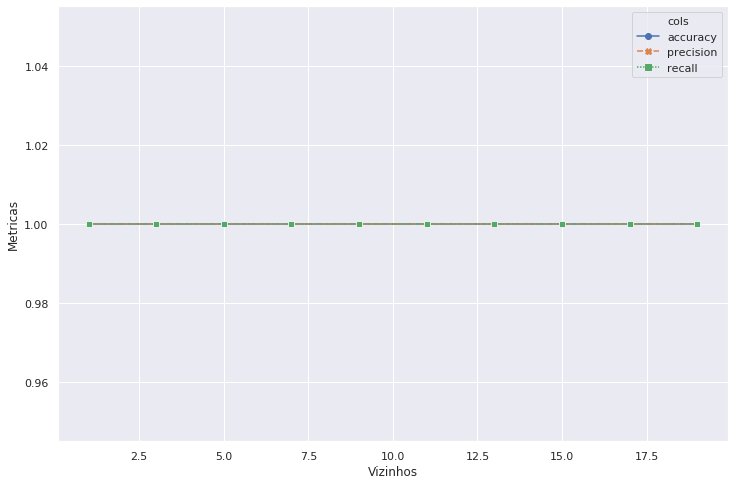

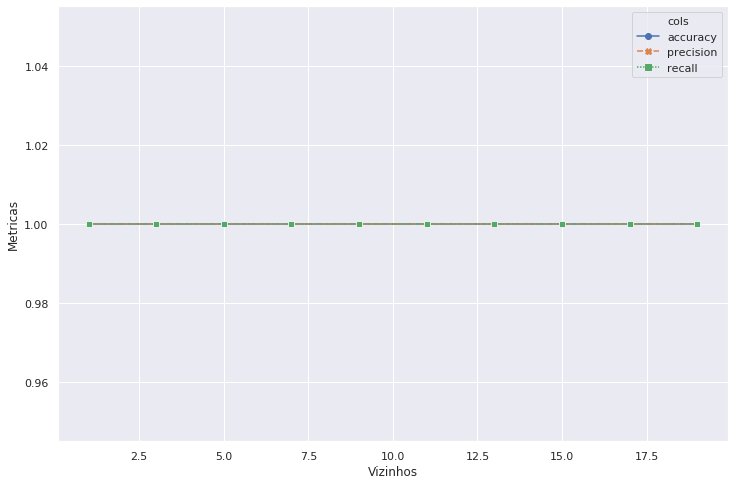

In [42]:
plotMetrics(k11, am11, pm11, rm11, 'dataset11CrescentFullMoonMeuKNN')
plotMetrics(k11, a11, p11, r11, 'dataset11CrescentFullMoonKNN')

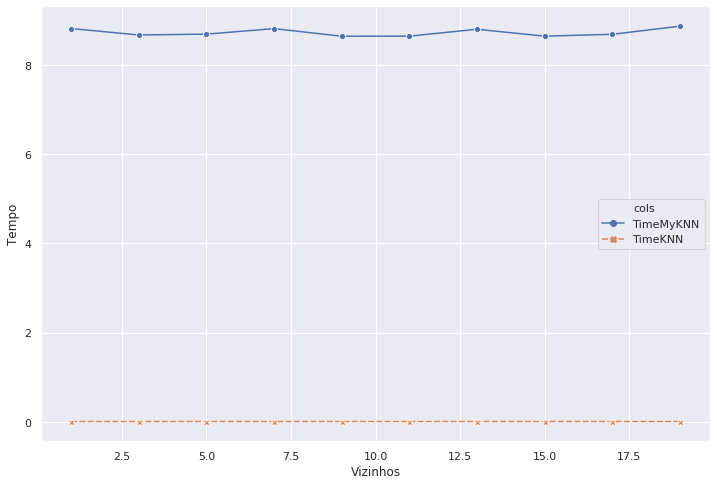

In [43]:
plotTime(k11 ,tm11, t11, 'CrescentFullMoonTime')

# DATASET 12 --> Outlier

### Importando dataset e separando em dados de teste e treino

In [44]:
dataset12 = pd.read_csv('./datasets/outlier.csv', header = None, names=['feat1', 'feat2', 'target']) 

xTrain, xTest, yTrain, yTest = tts(dataset12[['feat1', 'feat2']].values, dataset12.target.values, shuffle = True, test_size = 0.25)

### Treinando o KNN 

In [45]:

am12, pm12, rm12, tm12, a12, p12, r12, t12, k12 = ComputationAlgoReturn(xTrain, xTest, yTrain, yTest, 20)

## Plotando Métricas 

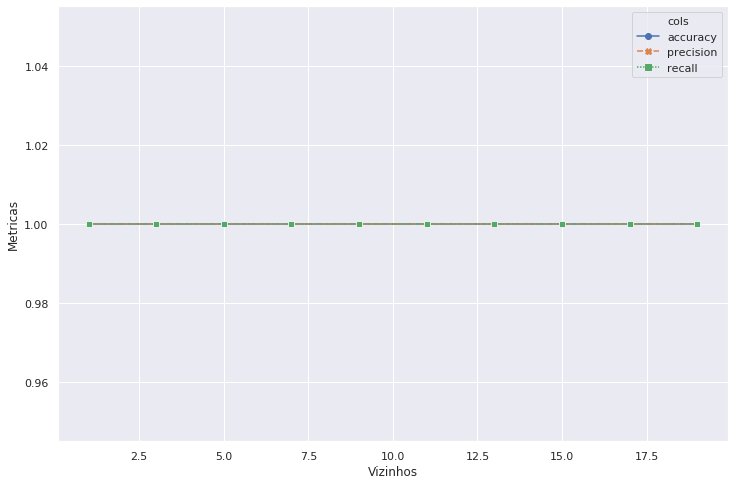

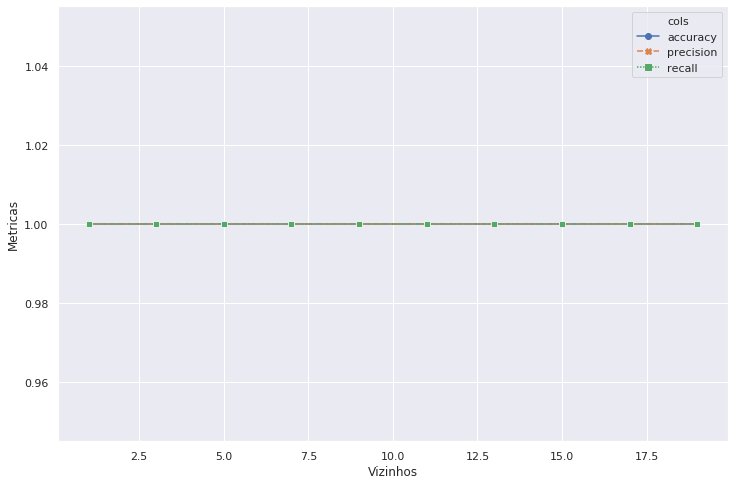

In [46]:
plotMetrics(k12, am12, pm12, rm12, 'dataset12OutlierMeuKNN')
plotMetrics(k12, a12, p12, r12, 'dataset12OutlierKNN')

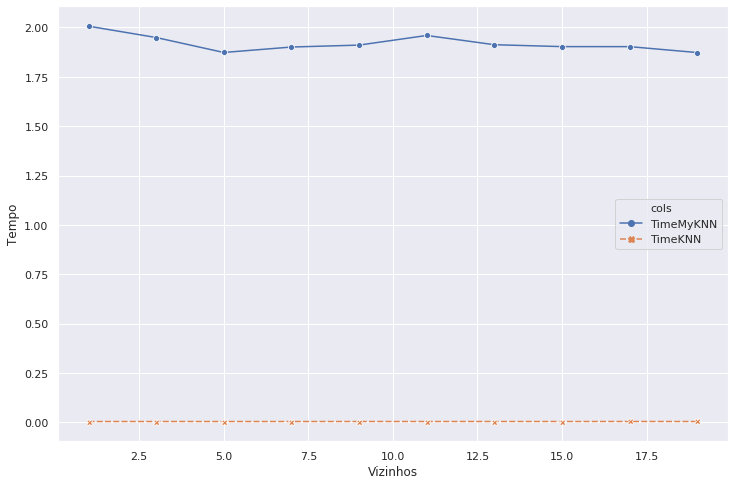

In [47]:
plotTime(k12 ,tm12, t12, 'outlierTime')

# DATASET 13 --> The Olivetti Faces

### Importando dataset e separando em dados de teste e treino

In [48]:
dataset = datasets.fetch_olivetti_faces()
data, target = dataset.data, dataset.target

xTrain, xTest, yTrain, yTest = tts(data, target, shuffle = True, test_size = 0.25)

### Treinando o KNN 

In [49]:

am13, pm13, rm13, tm13, a13, p13, r13, t13, k13 = ComputationAlgoReturn(xTrain, xTest, yTrain, yTest, 20)

/home/william/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/william/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/william/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/william/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/william/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classificati

## Plotando Métricas 

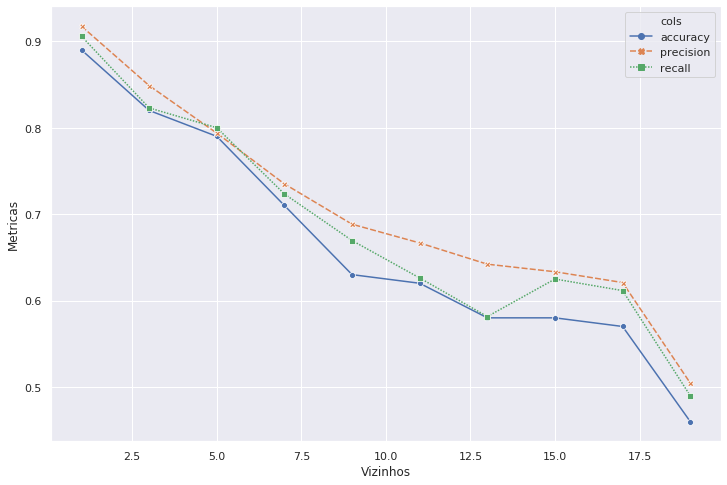

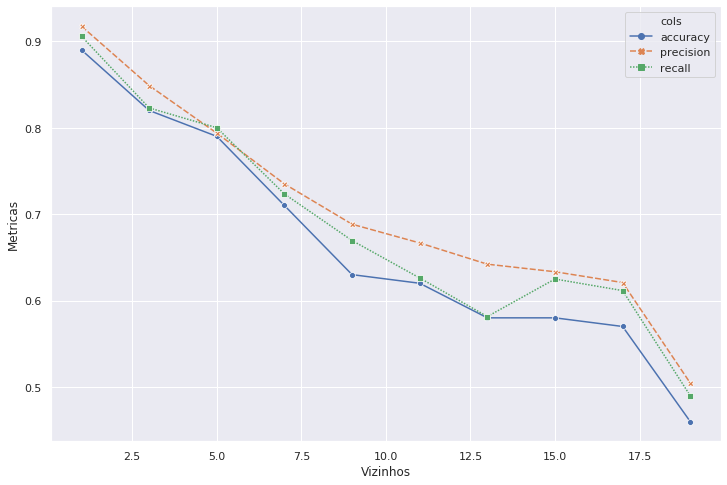

In [50]:
plotMetrics(k13, am13, pm13, rm13, 'dataset13OlivettiFaceMeuKNN')
plotMetrics(k13, a13, p13, r13, 'dataset13OlivettiFaceKNN')

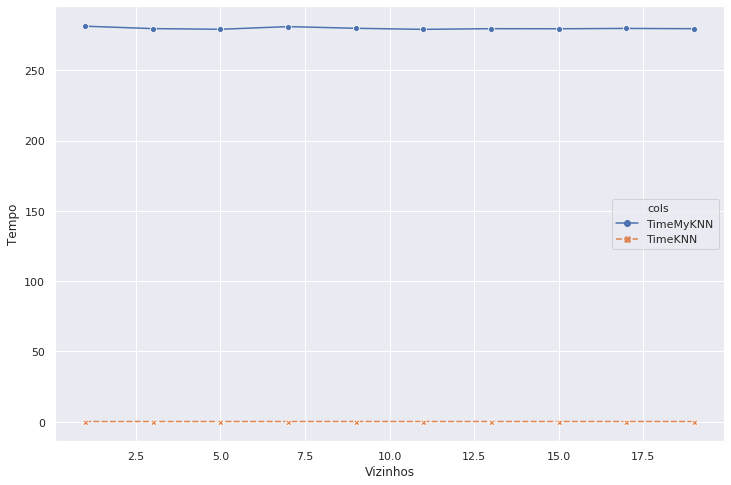

In [51]:
plotTime(k13 ,tm13, t13, 'olivettiFaceTime')

## PLOTS DATASET

## PARTE I

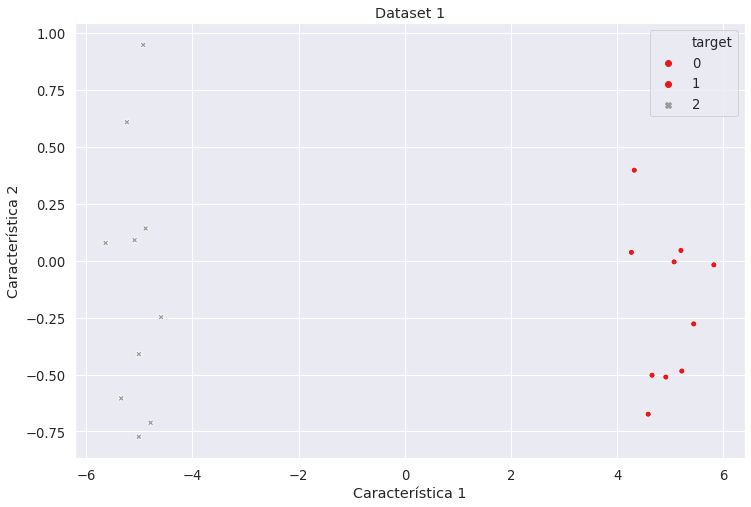

In [178]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid", font_scale = 1.2)

g = sns.scatterplot(x="feat1", y="feat2", hue='target', data=dataset1, markers=True, style="target",  palette="Set1",  )
g.set_title('Dataset 1')
g.set_xlabel('Característica 1')
g.set_ylabel('Característica 2') 
#g.set(xlim=(-15,15),ylim=(-15,15))
#g.set_xticks(np.arange(-6, 6 + 1, 5))  # adjust the x tick frequency
#g.set_yticks(np.arange(-6, 12 + 1, 5))  # adjust the y tick frequency



plt.savefig('./DataSetPlot/dataset1.pdf', format='pdf', bbox_inches = 'tight', dpi = 400)
#plt.setp(g.get_legend().get_texts(), fontsize='12') # for legend text
plt.show(g)

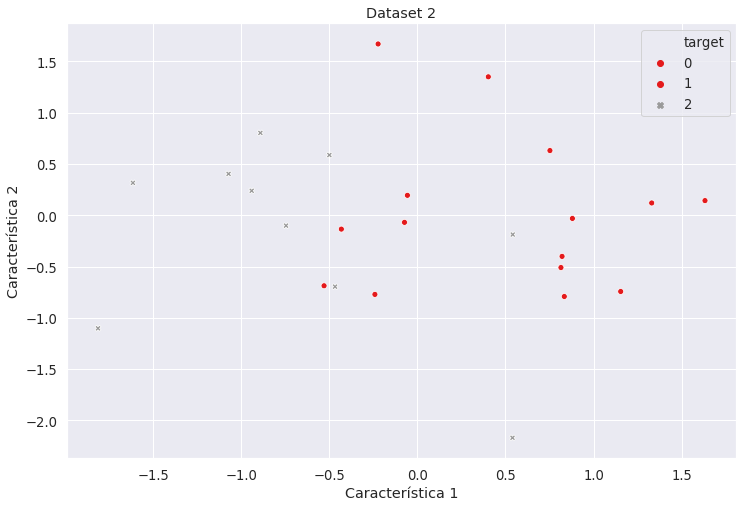

In [179]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid", font_scale = 1.2)

g = sns.scatterplot(x="feat1", y="feat2", hue='target', data=dataset2, markers=True, style="target",  palette="Set1",  )
g.set_title('Dataset 2')
g.set_xlabel('Característica 1')
g.set_ylabel('Característica 2') 
#g.set(xlim=(-15,15),ylim=(-15,15))
#g.set_xticks(np.arange(-6, 6 + 1, 5))  # adjust the x tick frequency
#g.set_yticks(np.arange(-6, 12 + 1, 5))  # adjust the y tick frequency



plt.savefig('./DataSetPlot/dataset2.pdf', format='pdf', bbox_inches = 'tight', dpi = 400)
#plt.setp(g.get_legend().get_texts(), fontsize='12') # for legend text
plt.show(g)

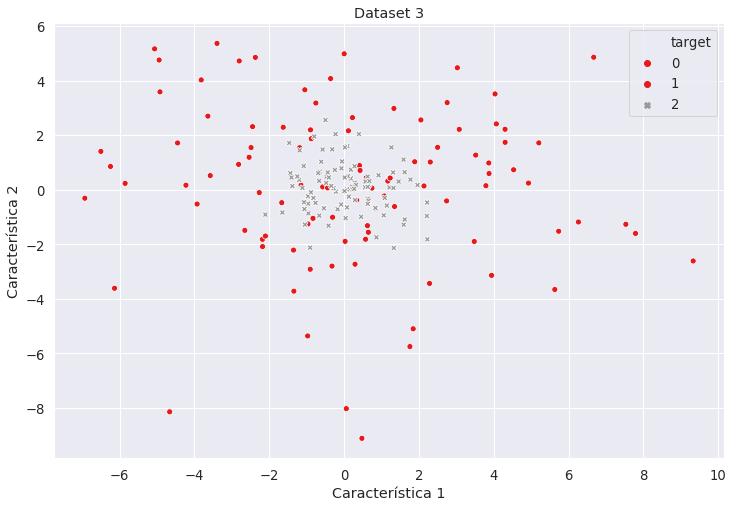

In [180]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid", font_scale = 1.2)

g = sns.scatterplot(x="feat1", y="feat2", hue='target', data=dataset3, markers=True, style="target",  palette="Set1",  )
g.set_title('Dataset 3')
g.set_xlabel('Característica 1')
g.set_ylabel('Característica 2') 
#g.set(xlim=(-15,15),ylim=(-15,15))
#g.set_xticks(np.arange(-6, 6 + 1, 5))  # adjust the x tick frequency
#g.set_yticks(np.arange(-6, 12 + 1, 5))  # adjust the y tick frequency



plt.savefig('./DataSetPlot/dataset3.pdf', format='pdf', bbox_inches = 'tight', dpi = 400)
#plt.setp(g.get_legend().get_texts(), fontsize='12') # for legend text
plt.show(g)

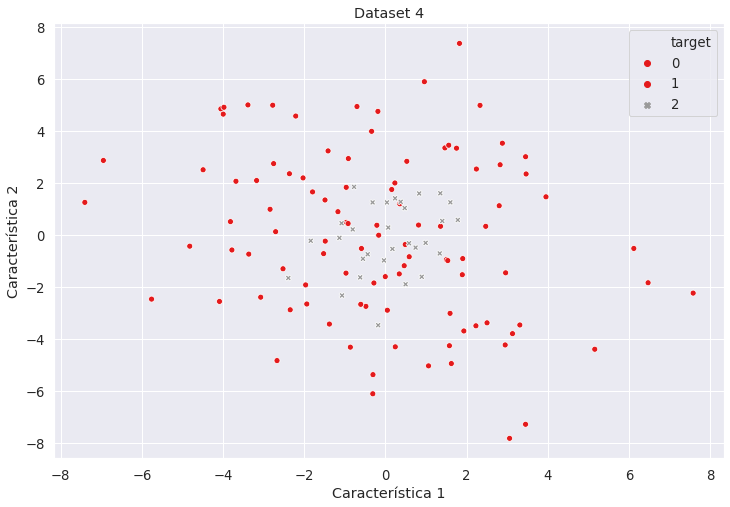

In [181]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid", font_scale = 1.2)

g = sns.scatterplot(x="feat1", y="feat2", hue='target', data=dataset4, markers=True, style="target",  palette="Set1",  )
g.set_title('Dataset 4')
g.set_xlabel('Característica 1')
g.set_ylabel('Característica 2') 
#g.set(xlim=(-15,15),ylim=(-15,15))
#g.set_xticks(np.arange(-6, 6 + 1, 5))  # adjust the x tick frequency
#g.set_yticks(np.arange(-6, 12 + 1, 5))  # adjust the y tick frequency



plt.savefig('./DataSetPlot/dataset4.pdf', format='pdf', bbox_inches = 'tight', dpi = 400)
#plt.setp(g.get_legend().get_texts(), fontsize='12') # for legend text
plt.show(g)

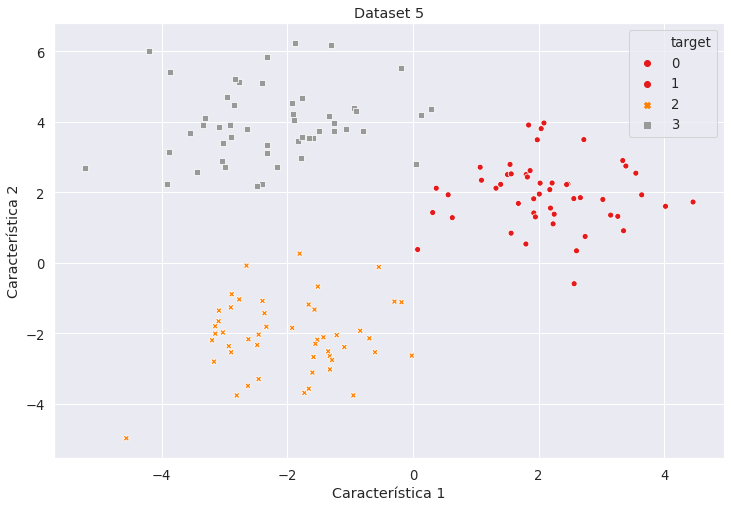

In [182]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid", font_scale = 1.2)

g = sns.scatterplot(x="feat1", y="feat2", hue='target', data=dataset5, markers=True, style="target",  palette="Set1",  )
g.set_title('Dataset 5')
g.set_xlabel('Característica 1')
g.set_ylabel('Característica 2') 
#g.set(xlim=(-15,15),ylim=(-15,15))
#g.set_xticks(np.arange(-6, 6 + 1, 5))  # adjust the x tick frequency
#g.set_yticks(np.arange(-6, 12 + 1, 5))  # adjust the y tick frequency



plt.savefig('./DataSetPlot/dataset5.pdf', format='pdf', bbox_inches = 'tight', dpi = 400)
#plt.setp(g.get_legend().get_texts(), fontsize='12') # for legend text
plt.show(g)

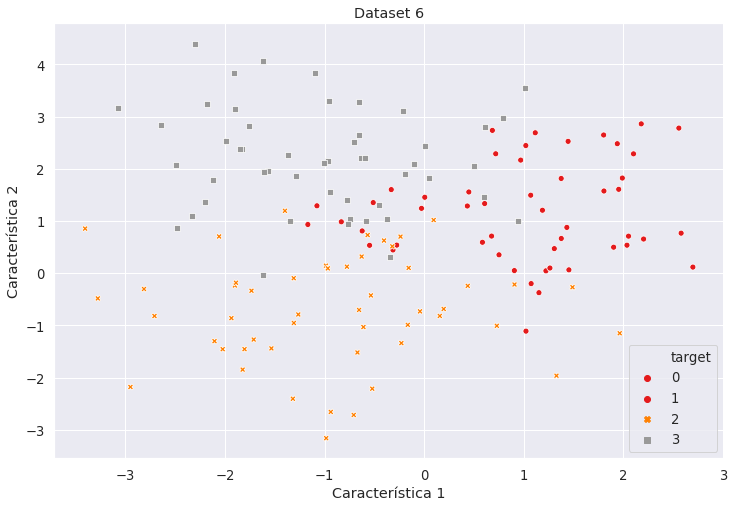

In [183]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid", font_scale = 1.2)

g = sns.scatterplot(x="feat1", y="feat2", hue='target', data=dataset6, markers=True, style="target",  palette="Set1",  )
g.set_title('Dataset 6')
g.set_xlabel('Característica 1')
g.set_ylabel('Característica 2') 
#g.set(xlim=(-15,15),ylim=(-15,15))
#g.set_xticks(np.arange(-6, 6 + 1, 5))  # adjust the x tick frequency
#g.set_yticks(np.arange(-6, 12 + 1, 5))  # adjust the y tick frequency



plt.savefig('./DataSetPlot/dataset6.pdf', format='pdf', bbox_inches = 'tight', dpi = 400)
#plt.setp(g.get_legend().get_texts(), fontsize='12') # for legend text
plt.show(g)

## PARTE II

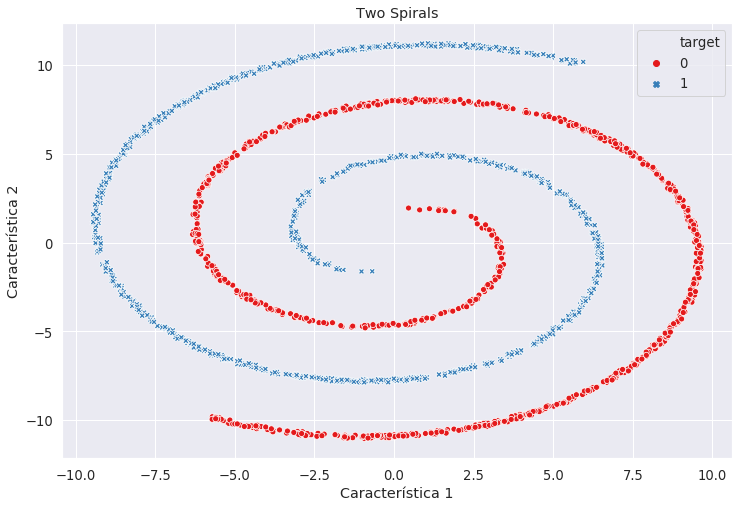

In [184]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid", font_scale = 1.2)

g = sns.scatterplot(x="feat1", y="feat2", hue='target', data=dataset7, markers=True, style="target",  palette="Set1",  )
g.set_title('Two Spirals')
g.set_xlabel('Característica 1')
g.set_ylabel('Característica 2') 
#g.set(xlim=(-15,15),ylim=(-15,15))
#g.set_xticks(np.arange(-15, 15 + 1, 5))  # adjust the x tick frequency
#g.set_yticks(np.arange(-15, 12 + 1, 5))  # adjust the y tick frequency



plt.savefig('./DataSetPlot/twospiral.pdf', format='pdf', bbox_inches = 'tight', dpi = 400)
#plt.setp(g.get_legend().get_texts(), fontsize='12') # for legend text
plt.show(g)




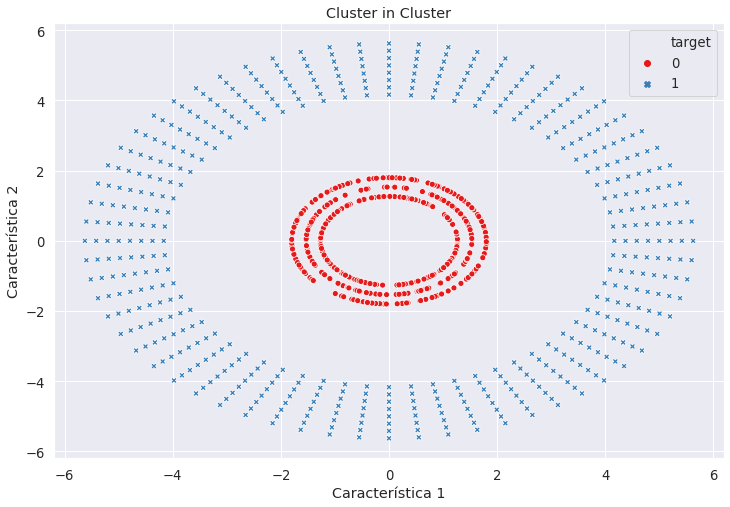

In [185]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid", font_scale = 1.2)

g = sns.scatterplot(x="feat1", y="feat2", hue='target', data=dataset8, markers=True, style="target",  palette="Set1",  )
g.set_title('Cluster in Cluster')
g.set_xlabel('Característica 1')
g.set_ylabel('Característica 2') 
#g.set(xlim=(-15,15),ylim=(-15,15))
#g.set_xticks(np.arange(-15, 15 + 1, 5))  # adjust the x tick frequency
#g.set_yticks(np.arange(-15, 12 + 1, 5))  # adjust the y tick frequency



plt.savefig('./DataSetPlot/clusterincluster.pdf', format='pdf', bbox_inches = 'tight', dpi = 400)
#plt.setp(g.get_legend().get_texts(), fontsize='12') # for legend text
plt.show(g)


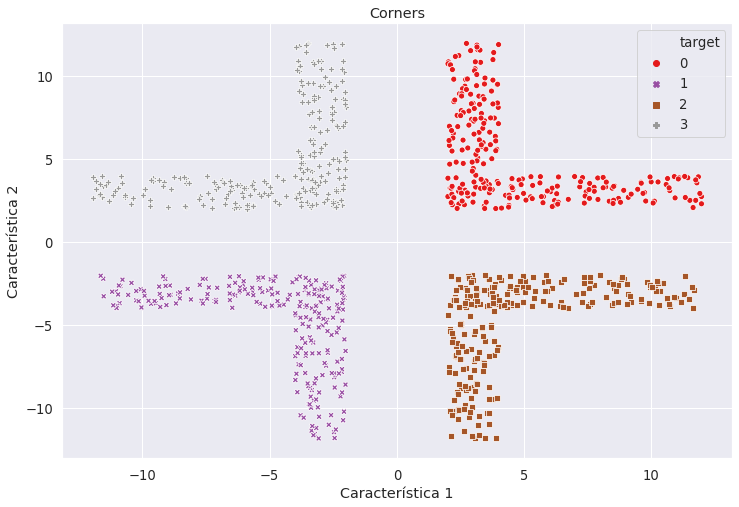

In [186]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid", font_scale = 1.2)

g = sns.scatterplot(x="feat1", y="feat2", hue='target', data=dataset9, markers=True, style="target",  palette="Set1",  )
g.set_title('Corners')
g.set_xlabel('Característica 1')
g.set_ylabel('Característica 2') 
#g.set(xlim=(-15,15),ylim=(-15,15))
#g.set_xticks(np.arange(-15, 15 + 1, 5))  # adjust the x tick frequency
#g.set_yticks(np.arange(-15, 12 + 1, 5))  # adjust the y tick frequency


plt.savefig('./DataSetPlot/corners.pdf', format='pdf', bbox_inches = 'tight', dpi = 400)
#plt.setp(g.get_legend().get_texts(), fontsize='12') # for legend text
plt.show(g)

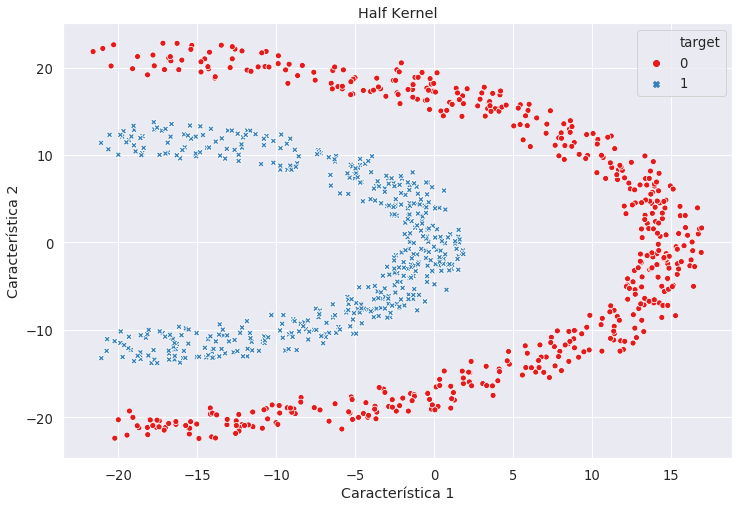

In [187]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid", font_scale = 1.2)

g = sns.scatterplot(x="feat1", y="feat2", hue='target', data=dataset10, markers=True, style="target",  palette="Set1",  )
g.set_title('Half Kernel')
g.set_xlabel('Característica 1')
g.set_ylabel('Característica 2') 
#g.set(xlim=(-15,15),ylim=(-15,15))
#g.set_xticks(np.arange(-15, 15 + 1, 5))  # adjust the x tick frequency
#g.set_yticks(np.arange(-15, 12 + 1, 5))  # adjust the y tick frequency



plt.savefig('./DataSetPlot/halfkernel.pdf', format='pdf', bbox_inches = 'tight', dpi = 400)
#plt.setp(g.get_legend().get_texts(), fontsize='12') # for legend text
plt.show(g)

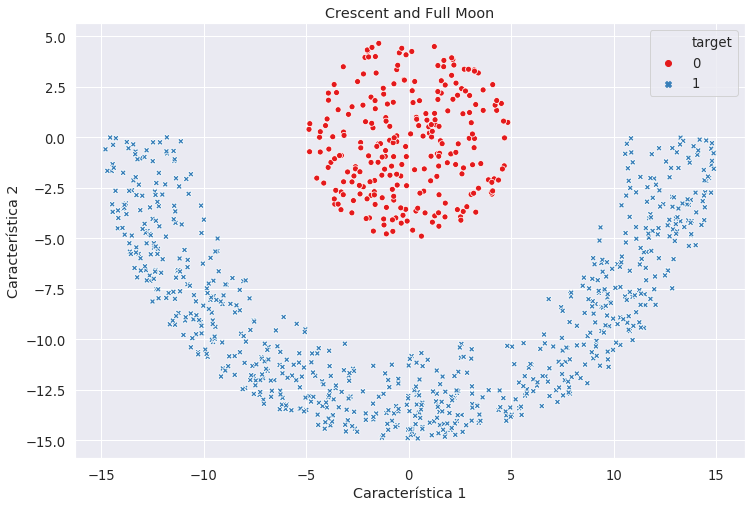

In [188]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid", font_scale = 1.2)

g = sns.scatterplot(x="feat1", y="feat2", hue='target', data=dataset11, markers=True, style="target",  palette="Set1",  )
g.set_title('Crescent and Full Moon')
g.set_xlabel('Característica 1')
g.set_ylabel('Característica 2') 
#g.set(xlim=(-15,15),ylim=(-15,15))
#g.set_xticks(np.arange(-15, 15 + 1, 5))  # adjust the x tick frequency
#g.set_yticks(np.arange(-15, 12 + 1, 5))  # adjust the y tick frequency



plt.savefig('./DataSetPlot/crescentfullmoon.pdf', format='pdf', bbox_inches = 'tight', dpi = 400)
#plt.setp(g.get_legend().get_texts(), fontsize='12') # for legend text
plt.show(g)

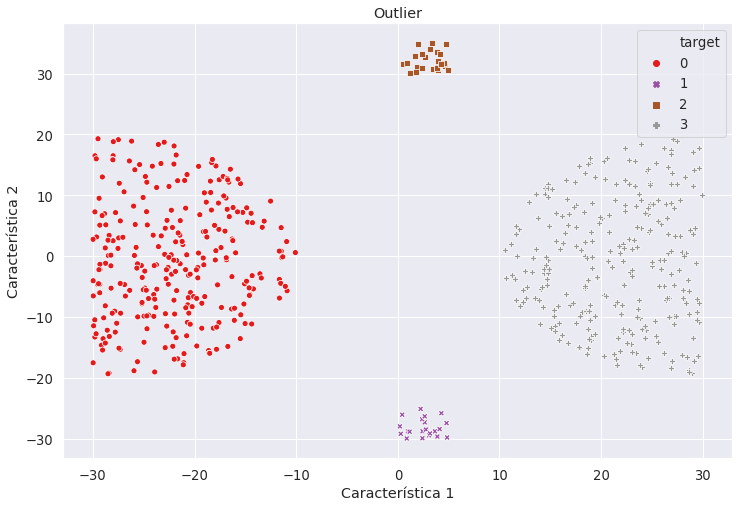

In [189]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid", font_scale = 1.2)

g = sns.scatterplot(x="feat1", y="feat2", hue='target', data=dataset12, markers=True, style="target",  palette="Set1",  )
g.set_title('Outlier')
g.set_xlabel('Característica 1')
g.set_ylabel('Característica 2') 
#g.set(xlim=(-15,15),ylim=(-15,15))
#g.set_xticks(np.arange(-15, 15 + 1, 5))  # adjust the x tick frequency
#g.set_yticks(np.arange(-15, 12 + 1, 5))  # adjust the y tick frequency



plt.savefig('./DataSetPlot/outlier.pdf', format='pdf', bbox_inches = 'tight', dpi = 400)
#plt.setp(g.get_legend().get_texts(), fontsize='12') # for legend text
plt.show(g)

# Olivetti Confusion Matrix

 ## Melhor RESULTADO

In [66]:
from sklearn.metrics import confusion_matrix


dataset = datasets.fetch_olivetti_faces()
data, target = dataset.data, dataset.target

xTrain, xTest, yTrain, yTest = tts(data, target, shuffle = True, test_size = 0.25)



KNN_SK = KNeighborsClassifier(n_neighbors=1)
KNN_SK.fit(xTrain, yTrain)
results_SK = KNN_SK.predict(xTest)
        
confusion_plot  = confusion_matrix(results_SK, yTest)

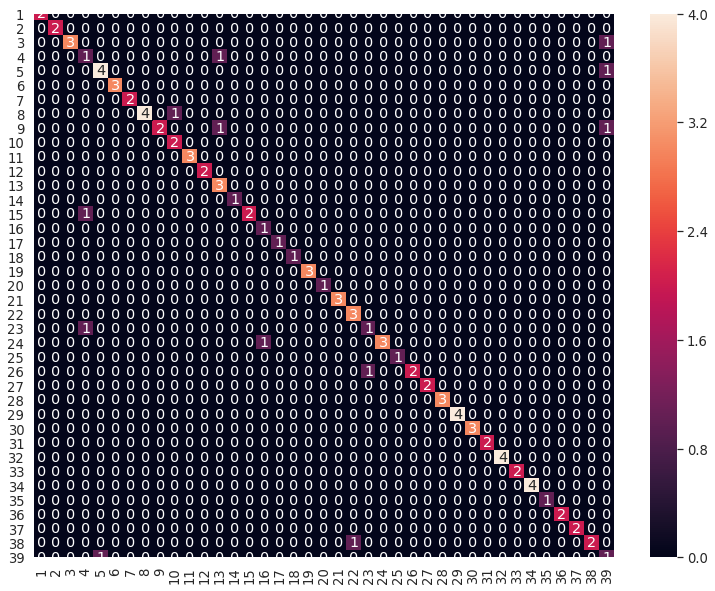

In [68]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_plot, index = [i for i in range(1,40)],
                  columns = [i for i in range(1,40)])

plt.figure(figsize=(13, 10))
sns.set(style="whitegrid", font_scale = 1.2)
sn.heatmap(df_cm, annot=True)
plt.plot()
plt.savefig('./DataSetPlot/piorOlivetti.pdf', format='pdf', bbox_inches = 'tight', dpi = 400)

## Pior Resultado

In [69]:
from sklearn.metrics import confusion_matrix

KNN_SK = KNeighborsClassifier(n_neighbors=19)
KNN_SK.fit(xTrain, yTrain)
results_SK = KNN_SK.predict(xTest)
        
confusion_plot  = confusion_matrix(results_SK, yTest)

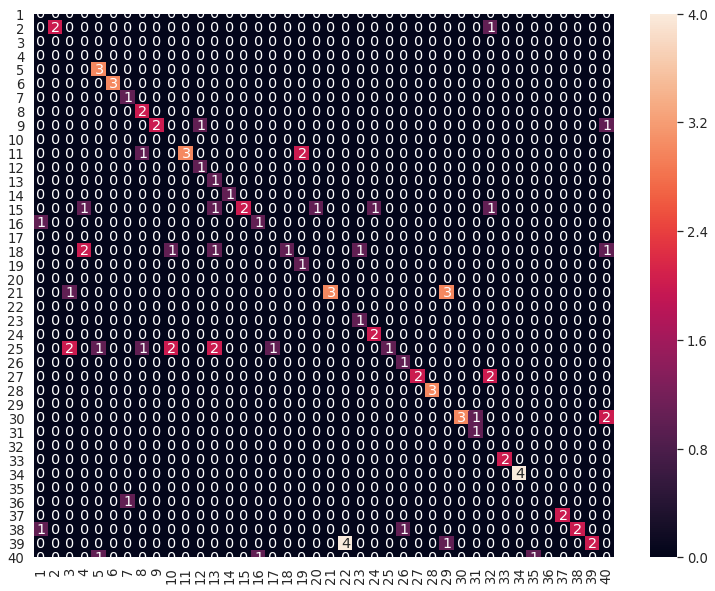

In [70]:
df_cm = pd.DataFrame(confusion_plot, index = [i for i in range(1,41)],
                  columns = [i for i in range(1,41)])

plt.figure(figsize=(13, 10))
sns.set(style="whitegrid", font_scale = 1.2)
sn.heatmap(df_cm, annot=True)
plt.plot()
plt.savefig('./DataSetPlot/melhorOlivetti.pdf', format='pdf', bbox_inches = 'tight', dpi = 400)